In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
mnist = tf.keras.datasets.mnist



ModuleNotFoundError: No module named 'tensorflow'

In [22]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [23]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [24]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [25]:
pd.Series(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

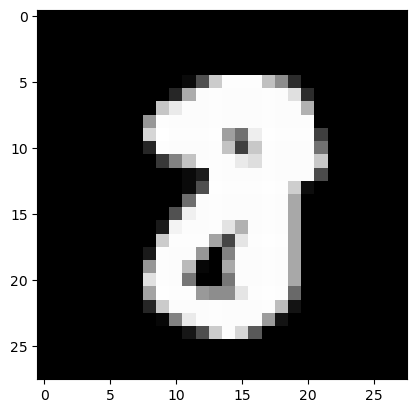

In [31]:
plt.imshow(x_train[2598], cmap=plt.get_cmap('gray'));

In [69]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])


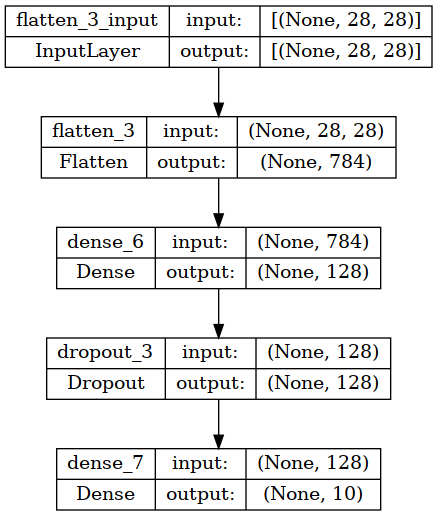

In [63]:
tf.keras.utils.plot_model(model, "model.png",show_shapes=True)

In [64]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.83817255, -0.03661836,  0.64574856, -0.08003904,  0.04540854,
        -0.40488103, -0.21200319, -0.4697337 , -0.01565666,  0.04744986]],
      dtype=float32)

In [35]:
tf.nn.softmax(predictions).numpy()

array([[0.086151  , 0.16646169, 0.10934648, 0.13619447, 0.08478604,
        0.08395255, 0.05507313, 0.10485328, 0.11603972, 0.05714157]],
      dtype=float32)

In [36]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [70]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.8483 - accuracy: 0.7275


In [71]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.3702 - accuracy: 0.9021 - 896ms/epoch - 3ms/step


[0.370168536901474, 0.9021000266075134]

[[0.06 0.   0.73 0.19 0.   0.01 0.01 0.   0.   0.  ]]


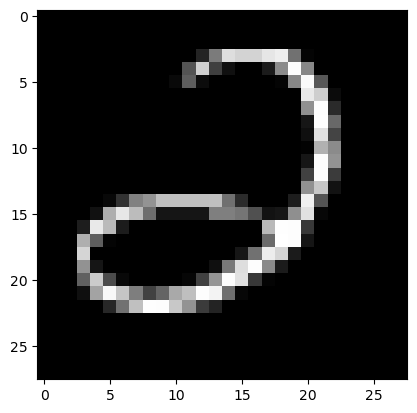

In [68]:
num = 1050
plt.imshow(x_test[num], cmap=plt.get_cmap('gray'))
print(np.round(tf.nn.softmax(model(x_test[num:num+1])).numpy(),2))
#print(np.round(model(x_test[num:num+1]).numpy(),2))

### Keras Functional API

In [72]:
parameters = {"shape":28, "activation": "relu", "classes": 10, "units":12, "optimizer":"adam", "epochs":1,"kernel_size":3,"pool_size":2, "dropout":0.5}

inputs = tf.keras.Input(shape=(parameters["shape"], parameters["shape"]))
flatten = tf.keras.layers.Flatten()(inputs)
dense = tf.keras.layers.Dense(128, activation='relu')(flatten)
dropout =  tf.keras.layers.Dropout(0.2)(dense)
outputs = tf.keras.layers.Dense(parameters["classes"], activation="softmax")(dropout)

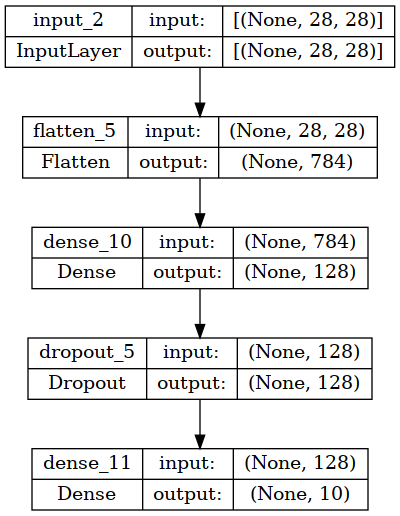

In [73]:
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
tf.keras.utils.plot_model(model, "model.png",show_shapes=True)


In [80]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, epochs=5)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/5


/home/tevfik/miniforge3/envs/tf/lib/python3.11/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 23s 12ms/step - loss: 0.0890 - accuracy: 0.9735
Epoch 2/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0740 - accuracy: 0.9775
Epoch 3/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0661 - accuracy: 0.9787
Epoch 4/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0592 - accuracy: 0.9812
Epoch 5/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0553 - accuracy: 0.9825
313/313 - 3s - loss: 0.0664 - accuracy: 0.9807 - 3s/epoch - 10ms/step
Test loss: 0.06644667685031891
Test accuracy: 0.9807000160217285


In [81]:
history.history

{'loss': [0.08903700113296509,
  0.07404673844575882,
  0.06612244993448257,
  0.059236012399196625,
  0.05531599372625351],
 'accuracy': [0.9735000133514404,
  0.9774500131607056,
  0.9787333607673645,
  0.9812166690826416,
  0.9825000166893005]}

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


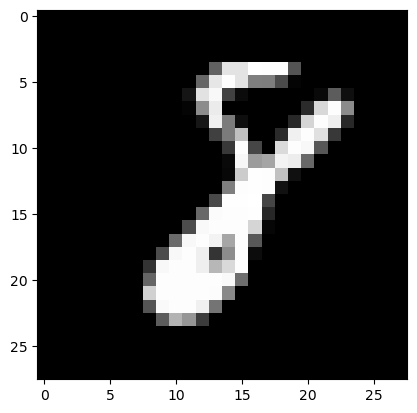

In [92]:
num = 2598
plt.imshow(x_test[num], cmap=plt.get_cmap('gray'))
print(np.round(model(x_test[num:num+1]).numpy(),2))